## Introduction
TODO

In [17]:
# Run for required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix #accuracy metrics for each classification
from sklearn.metrics import mean_squared_error, accuracy_score

## Dataset Description
Our dataset consists of quantitative descriptions of various wines. There are 1599 wines sampled. We have 11 features for each observation, each with a numeric rating of a physiochemical property of the wine such as alcohol content and acidity. The output variable we seek to predict corresponds to the quality rating of each wine on a scale from 0 to 10, from sensory data. There are no missing values. 

In [13]:
#Read in data
filename = "./winequality-red.csv"
df = pd.read_csv(filename, delimiter = ';')
X = df.values[:,0:-1]
y = df.values[:,-1]

#Normalize Feature Data
X = preprocessing.normalize(X)

#Split data into test/train sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .30, random_state = 101)

#Print dataset
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Experimental Setup 

We are using Python with the numpy and pandas libraries, as well as classifiers from the sklearn library. We are processing the data by (...). The algorithms we are considering are (...). For each algorithm (including choice of hyperparameters) we are using K-folds cross validation with K=5 and for each fold checking the mean accuracy. (But question - if we use a classifier but also e.g. linear regression, how do we compare performance?)

TODO 
- test various hyperparameters (I just picked random ones)
- research accuracy_score and make sure it's the performance metric we want to use
- "Make sure that the way you evaluate this avoids bias and overfitting"
- write up

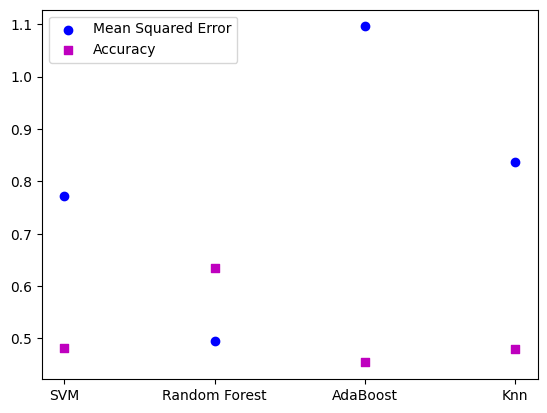

In [20]:
# ML Estimators to test
names = ["SVM",
         "Random Forest",
         "AdaBoost",
         "Knn"
         ]
estimators = [SVC(),
              RandomForestClassifier(),
              AdaBoostClassifier(),
              KNeighborsClassifier(),
              ]

# Cost metrics to compare
mse = []
acc = []

# Run each estimator and evaluate cost metric
for name, est in zip(names, estimators):
    est.fit(X_train, y_train)
    y_pred = est.predict(X_test)
    mse.append(mean_squared_error(y_pred, y_test))
    acc.append(accuracy_score(y_pred, y_test))

# Plot results
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(names, mse, c='b', marker='o', label='Mean Squared Error')
ax1.scatter(names, acc, c='m', marker='s', label='Accuracy')
plt.legend(loc='best')
plt.show()

## NOT SURE IF WE NEED ANYTHING BELOW HERE


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .30, random_state = 101)

# Support Vector Classifier
print("-----Support Vector Classifier-----")
params = {'C': [0.1, 1, 10, 100]}
grid = GridSearchCV(SVC(), params, refit = True, cv = 5, verbose = 3, n_jobs = -1)
grid.fit(X_train, y_train)
print("Best Parameters: ", grid.best_params_)
y_pred = grid.predict(X_test)
#print(classification_report(y_test, grid_predictions))
print("Accuracy: ", accuracy_score(y_test, y_pred))

# KNN
print("\n-----Knn Classifier-----")
params = {'n_neighbors': [3,5,7], 
          'weights': ['uniform', 'distance']}
grid = GridSearchCV(KNeighborsClassifier(), params, refit = True, cv = 5, verbose = 3, n_jobs = -1)
grid.fit(X_train, y_train)
print("Best Parameters: ", grid.best_params_)
y_pred = grid.predict(X_test)
#print(classification_report(y_test, grid_predictions))
print("Accuracy: ", accuracy_score(y_test, y_pred))

# Random Forest
print("\n-----Random Forest Classifier-----")
params = {'n_estimators': [5,10,20]}
grid = GridSearchCV(RandomForestClassifier(), params, refit = True, cv = 5, verbose = 3, n_jobs = -1)
grid.fit(X_train, y_train)
print("Best Parameters: ", grid.best_params_)
y_pred = grid.predict(X_test)
#print(classification_report(y_test, grid_predictions))
print("Accuracy: ", accuracy_score(y_test, y_pred))

-----Support Vector Classifier-----
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters:  {'C': 100}
Accuracy:  0.5958333333333333

-----Knn Classifier-----
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best Parameters:  {'n_neighbors': 7, 'weights': 'distance'}
Accuracy:  0.5583333333333333

-----Random Forest Classifier-----
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Parameters:  {'n_estimators': 20}
Accuracy:  0.6520833333333333


## Results
TODO -
- display results in a fancy way (GridSearchCV might have something)
- choose and fit model
- display model in a fancy way?
- write up

In [24]:
X = df.values[:,0:-1]
y = df.values[:,-1]
cross_val_score(RandomForestClassifier(), X, y, cv=5) # Gives the accuracy of each of K fold tests for a Random Forest with all default hyperparameters

array([0.515625  , 0.55625   , 0.590625  , 0.60625   , 0.57366771])

### Random Forest Classifier

In [ ]:
cross_val_score(RandomForestClassifier(), X, y, cv=5) # Gives the accuracy of each of K fold tests for a Random Forest 

In [14]:
#This was just me doing the above the longer way to see all the pieces
kf = KFold(n_splits = 5)
scores = np.zeros(5)
for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train = df.values[train_index, 0:-1]
    y_train = df.values[train_index, -1]
    X_test = df.values[test_index, 0:-1]
    y_test = df.values[test_index, -1]
    rfmodel = RandomForestClassifier().fit(X_train, y_train)
    scores[i]= rfmodel.score(X_test,y_test)